# Let's set up Python Agent

In [1]:
import json
import os
import openai
import pdfplumber

with open('../settings.json') as f:
    data = json.load(f)

os.environ['OPENAI_API_KEY'] = data['API_KEY']
openai.api_key = os.environ['OPENAI_API_KEY']

In [7]:
from langchain.agents.agent_toolkits import create_python_agent
from langchain.tools.python.tool import PythonREPLTool
from langchain.python import PythonREPL
from langchain.llms.openai import OpenAI
from langchain.agents.agent_types import AgentType
from langchain.chat_models import ChatOpenAI

In [3]:
agent_executor = create_python_agent(
    llm=ChatOpenAI(temperature=0, model="gpt-3.5-turbo-0613"),
    tool=PythonREPLTool(),
    verbose=True,
    agent_type=AgentType.OPENAI_FUNCTIONS,
    agent_executor_kwargs={"handle_parsing_errors": True},
)

In [16]:
agent_executor.run("What is the 10th fibonacci number?")



> Entering new  chain...

Invoking: `Python_REPL` with `def fibonacci(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)

fibonacci(10)`


The 10th Fibonacci number is 55.

> Finished chain.


'The 10th Fibonacci number is 55.'

In [31]:
agent_executor.run("Make a pandas dataframe example and traspose it")



> Entering new  chain...

Invoking: `Python_REPL` with `import pandas as pd

# Create a dictionary of data
data = {'Name': ['John', 'Emma', 'Mike'], 'Age': [25, 28, 30], 'City': ['New York', 'London', 'Paris']}

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Transpose the DataFrame
df_transposed = df.transpose()

# Print the transposed DataFrame
df_transposed`


Here is an example of a pandas DataFrame and its transpose:

```
     0       1      2
Name   John    Emma   Mike
Age     25      28     30
City   New York London  Paris
```

The transposed DataFrame looks like this:

```
        Name  Age      City
0       John   25  New York
1       Emma   28    London
2       Mike   30     Paris
```

> Finished chain.


'Here is an example of a pandas DataFrame and its transpose:\n\n```\n     0       1      2\nName   John    Emma   Mike\nAge     25      28     30\nCity   New York London  Paris\n```\n\nThe transposed DataFrame looks like this:\n\n```\n        Name  Age      City\n0       John   25  New York\n1       Emma   28    London\n2       Mike   30     Paris\n```'

# What about a more complex task

### Let's combine multiple tools and see if we can use python to perform some taks with our files with natural language orders

In [11]:
from langchain.agents.initialize import initialize_agent
from langchain.tools import FileSearchTool, ReadFileTool, ShellTool

tools = [
    PythonREPLTool(),
    FileSearchTool(),
    ShellTool()
]

In [12]:
agent_executor = initialize_agent(
    tools,
    llm=ChatOpenAI(temperature=0, model="gpt-3.5-turbo"),
    agent=AgentType.OPENAI_MULTI_FUNCTIONS,
    verbose=True
)

In [9]:
agent_executor.run("is there a ../slides/slides.pdf file?")



> Entering new  chain...

Invoking: `file_search` with `{'dir_path': '../slides', 'pattern': 'slides.pdf'}`


slides.pdfYes, there is a `slides.pdf` file in the `../slides` directory.

> Finished chain.


'Yes, there is a `slides.pdf` file in the `../slides` directory.'

In [10]:
agent_executor.run("Read the ../slides/slides.pdf and make a summary of its content. Use pdfplumber")



> Entering new  chain...

Invoking: `Python_REPL` with `{'query': "import pdfplumber\n\nwith pdfplumber.open('../slides/slides.pdf') as pdf:\n    text = ''\n    for page in pdf.pages:\n        text += page.extract_text()\n\nprint(text)"}`


Expanding the Capabilities of LLMs Through
Community Collaboration
ANTONIO VELASCO FERNÁNDEZ & JOSE PABLO CABEZA GARCÍA, ELASTACLOUD
THURSDAY, SEPTEMBER 21 • 11:55 - 12:35
PBLOCZ/LLM-COMMUNITY-TALK (GITHUB.COM)Open Source Summit Europe 2023: Expanding the Capabilities of LLMs Throu... (sched.com)
Abstract
In this talk, we will explore how community projects are being used to enhance large language models (LLMs), such as the
LLama Index, to overcome token limitations. We will discuss the development of LangChain, a community-driven ecosystem
aimed at expanding LLM capabilities by providing tools like AutoGPT. By leveraging the power of community collaboration,
we can overcome some of the challenges of working with LLMs, and unlock new possibilities

'The content of the slides.pdf is a talk about expanding the capabilities of large language models (LLMs) through community collaboration. The talk discusses the development of LangChain, a community-driven ecosystem aimed at enhancing LLM capabilities. It explores the role of open-source projects in expanding LLM capabilities and how attendees can contribute to these efforts.\n\nThe talk covers the following topics:\n- Introduction to LLMs and their development\n- Overview of open-source LLMs such as Llama 2, UL2, Flan-UL2, BLOOM, GPT-J-6B, and MPT-7B\n- Private and public development of LLMs\n- Community efforts in enhancing LLM capabilities\n- Evolution of LLMs from encoder-only to encoder-decoder and decoder-only models\n- Foundational papers in LLM research, including BERT and LLaMA\n- Overview of LLM APIs and the LLM ecosystem\n- Embeddings vector databases and their use in LLMs\n- Community efforts in combining LLMs with other sources of computation or knowledge\n- Examples of L

# Let's try a more specific Pandas Agent

## Load Example Dataset

In [ ]:
import sklearn.datasets

df, target = sklearn.datasets.load_iris(return_X_y=True, as_frame=True)
df["target"] = target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Set up Agent

In [6]:
from langchain.agents import create_pandas_dataframe_agent
from langchain.chat_models import ChatOpenAI
from langchain.agents.agent_types import AgentType

In [7]:
agent = create_pandas_dataframe_agent(OpenAI(temperature=0), df, verbose=True)

### Let's try an easy query

In [25]:
agent.run("how many rows are there?")



> Entering new  chain...
Thought: I need to count the number of rows
Action: python_repl_ast
Action Input: len(df)
Observation: 150
Thought: I now know the final answer
Final Answer: There are 150 rows.

> Finished chain.


'There are 150 rows.'

### Draw some plots



> Entering new  chain...
Thought: I need to plot the data
Action: python_repl_ast
Action Input: df.plot(x='sepal length (cm)', y='sepal width (cm)')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I now know the final answer
Final Answer: A plot of sepal width against sepal length.

> Finished chain.


'A plot of sepal width against sepal length.'

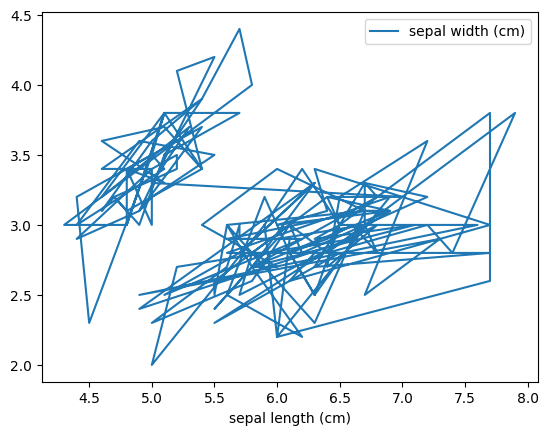

In [28]:
agent.run("plot sepal width against sepal length")

### More specific prompts could be needed for specific tasks



> Entering new  chain...
Thought: I need to create a scatter plot
Action: python_repl_ast
Action Input: df.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c='target')
Observation: Axes(0.125,0.11;0.62x0.77)
Thought:

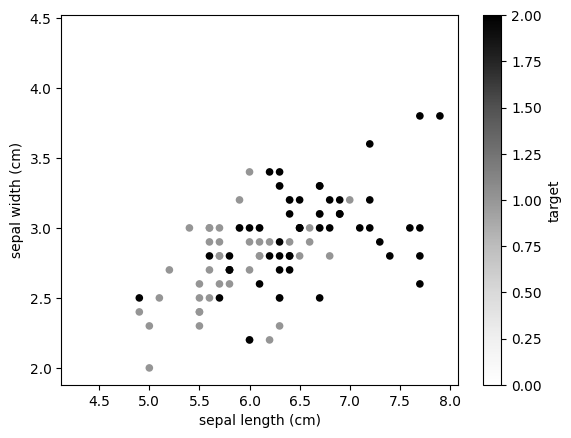

 I need to show the plot
Action: python_repl_ast
Action Input: plt.show()
Observation: 
Thought: I now know the final answer
Final Answer: A scatter plot of sepal width against sepal length, with target as labels.

> Finished chain.


'A scatter plot of sepal width against sepal length, with target as labels.'

In [30]:
agent.run("scatter plot sepal width against sepal length, use target as labels")



> Entering new  chain...

Thought: I need to understand the data better before I can build an ML solution.
Action: python_repl_ast
Action Input: df.describe()
Observation:        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%         

'The EDA on the df dataset revealed the data types, number of entries, correlation between the features and the target, and the distribution of the data.'

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

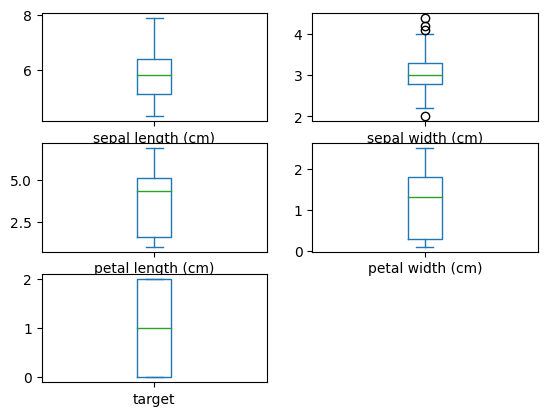

In [9]:
agent.run("You are a Data Scientist tasked with analysing the df data and building an ML solution to classify the samples by the 'target'. Perform and EDA on the df dataset. Make a plan on what you need to do and execute it sensibly.")

In [11]:
agent.run("Split the df dataset into test and train with a 0.2 0.8 ratio. ")



> Entering new  chain...
Thought: I need to split the dataset into two parts
Action: python_repl_ast
Action Input: from sklearn.model_selection import train_test_split
Observation: 
Thought: I need to use the train_test_split function
Action: python_repl_ast
Action Input: X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)
Observation: 
Thought: I now know the final answer
Final Answer: X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

> Finished chain.


"X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)"

In [ ]:
agent.

In [14]:
agent.("Split the df dataset into test and train with a 0.2 0.8 ratio")

<coroutine object Chain.arun at 0x0000020173006680>

In [15]:
X_train

NameError: name 'X_train' is not defined

In [10]:
agent.run("You are a Data Scientist tasked with building an ML solution to classify the samples in the df dataset by the 'target'. Build a Random Forest Classifier. Make a plan on what you need to do and execute it sensibly.")



> Entering new  chain...

Thought: I need to build a Random Forest Classifier to classify the samples in the df dataset by the 'target'.
Action: python_repl_ast
Action Input: from sklearn.ensemble import RandomForestClassifier
Observation: 
Thought: I need to create an instance of the RandomForestClassifier
Action: python_repl_ast
Action Input: clf = RandomForestClassifier()
Observation: 
Thought: I need to fit the model to the data
Action: python_repl_ast
Action Input: clf.fit(df.drop('target', axis=1), df['target'])
Observation: RandomForestClassifier()
Thought: I now know the final answer
Final Answer: The Random Forest Classifier has been successfully created and fitted to the data.

> Finished chain.


'The Random Forest Classifier has been successfully created and fitted to the data.'

NameError: name 'agent_executor' is not defined